In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMZN', 'ANET',
    'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'DDOG', 'DOCS', 'DOCU',
    'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED', 'GOOG', 'IDXX',
    'INTG', 'ISRG', 'JD', 'LSPD', 'LULU', 'MDB', 'MELI', 'MNST', 'MSFT',
    'MTCH', 'NVCR', 'NVDA', 'OKTA', 'OPEN', 'PAC', 'PANW', 'PAYC',
    'PINS', 'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN', 'ROKU',
    'RVLV', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD',
    'TTWO', 'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD', 'XPEV', 'ZEN',
    'ZM']
BEST_0 = ['ALJJ', 'AVEO']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

68

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-08-28', datetime.date(2022, 8, 28))

In [4]:
batch = sorted(SYMBOLS + BEST_0) + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  73 of 73 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ADBE
   ...ADYEY
   ...ALJJ
   ...AMD
   ...AMZN
   ...ANET
   ...ASML
   ...AVEO
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...DDOG
   ...DOCS
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...FLGT
   ...GH
   ...GMED
   ...GOOG
   ...IDXX
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...OKTA
   ...OPEN
   ...PAC
   ...PANW
   ...PAYC
   ...PINS
   ...PYPL
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...RIVN
   ...ROKU
   ...RVLV
   ...SE
   ...SHOP
   ...SNOW
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...TYL
   ...UPST
   ...VEEV
   ...VLD
   ...XPEV
   ...ZEN
   ...ZM
   ...^GSPC
   ...^IXIC
   ...^NYA


In [5]:
data['Date'].tail()

2511   2022-08-22
2512   2022-08-23
2513   2022-08-24
2514   2022-08-25
2515   2022-08-26
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.000844
2       0.992194
3       1.005073
4       0.998834
5       0.998932
          ...   
2511    0.978600
2512    0.997762
2513    1.002916
2514    1.014092
2515    0.966312
Name: ^GSPC, Length: 2515, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.003038
2,0.996186
3,1.016112
4,1.013757
5,0.998932
...,...
2511,0.981055
2512,1.003367
2513,1.022849
2514,1.034690


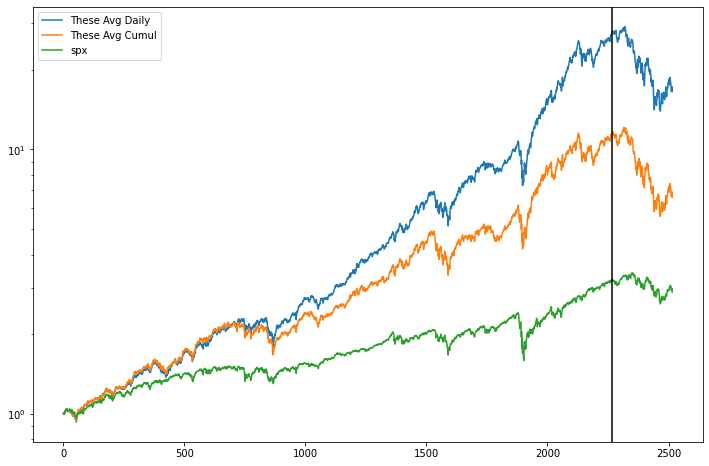

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-08-28,NaN,NaN
1,2012-08-29,1.001779,1.001779
2,2012-08-30,0.992476,0.992495
3,2012-08-31,1.001529,1.001546
4,2012-09-04,1.005046,1.004993


In [10]:
out.tail()

,Date,mine1,mine2
2511,2022-08-22,16.684179,6.690123
2512,2022-08-23,16.582238,6.661843
2513,2022-08-24,16.806884,6.725833
2514,2022-08-25,17.279400,6.915268
2515,2022-08-26,16.554516,6.587965


In [11]:
!ls ../data

dev_quantiles.csv           nasdaq_sharpes_by_state.csv
historic.csv                nya1965.csv
hmm_exp_returns.csv         pct_params
mine.csv                    scoring.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

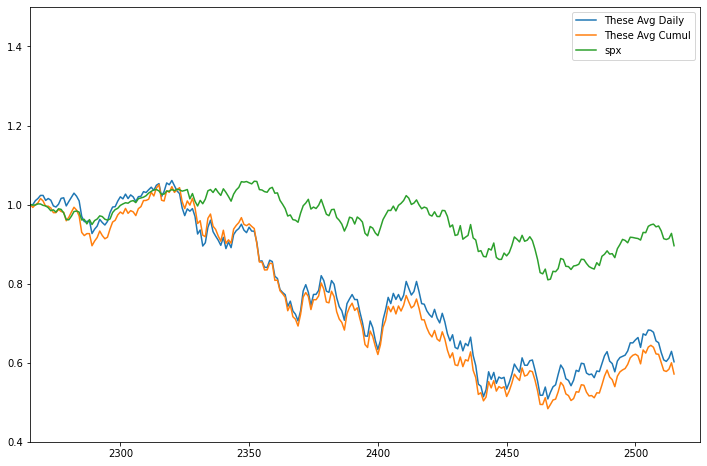

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=40):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2476,69.059998,69.059998,70.779999,66.320000,66.610001,4.234976,1.036781,1.032905,0.996261
2477,75.339996,75.339996,76.250000,66.190002,67.565002,4.322011,1.115074,1.090935,0.978352
2478,73.730003,73.730003,75.790001,71.669998,74.269997,4.300410,0.992729,0.978630,0.985798
2479,76.500000,76.500000,77.309998,73.900002,75.000000,4.337291,1.020000,1.037569,1.017225
2480,77.519997,77.519997,79.540001,74.500000,75.360001,4.350536,1.028662,1.013333,0.985098


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2476,69.059998,69.059998,70.779999,66.320000
2477,75.339996,75.339996,76.250000,66.190002
2478,73.730003,73.730003,75.790001,71.669998
2479,76.500000,76.500000,77.309998,73.900002
2480,77.519997,77.519997,79.540001,74.500000


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2476,69.059998,69.059998,70.779999,66.320000,76.250000,66.190002,1.104112,0.958442
2477,75.339996,75.339996,76.250000,66.190002,75.790001,71.669998,1.005973,0.951288
2478,73.730003,73.730003,75.790001,71.669998,77.309998,73.900002,1.048555,1.002306
2479,76.500000,76.500000,77.309998,73.900002,79.540001,74.500000,1.039739,0.973856
2480,77.519997,77.519997,79.540001,74.500000,76.000000,71.500000,0.980392,0.922343


0.05    0.978103
Name: HighMult, dtype: float64


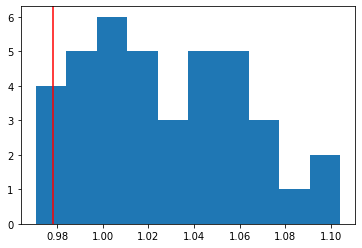

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.015697371611524


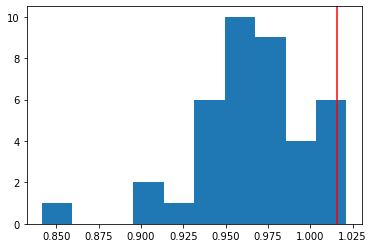

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.015697371611524, 0.9781029416744824)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0060613400209928, 0.9976091661258508)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2476,69.059998,69.059998,70.779999,66.320000,76.250000,66.190002,1.104112,0.958442,0
2477,75.339996,75.339996,76.250000,66.190002,75.790001,71.669998,1.005973,0.951288,1
2478,73.730003,73.730003,75.790001,71.669998,77.309998,73.900002,1.048555,1.002306,1
2479,76.500000,76.500000,77.309998,73.900002,79.540001,74.500000,1.039739,0.973856,1
2480,77.519997,77.519997,79.540001,74.500000,76.000000,71.500000,0.980392,0.922343,1


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0108482914530668,
 0.9812794251478111,
 1.0178881395801618,
 0.9758621411592003)

In [27]:
get_hilo_mults(aapl)

(1.0073823300676958, 0.9975359499157594, 1.003336937649812, 1.0054933750594715)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.007382,0.997536,1.003337,1.005493
1,ABMD,1.002540,0.994284,1.011021,0.992221
2,ABNB,1.017391,0.988244,1.005617,0.999934
3,ADBE,1.006659,0.992778,1.010748,0.993567
4,ADYEY,1.029640,0.971025,1.037558,0.939168


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,163.619995,AAPL
ABMD,258.119995,ABMD
ABNB,112.82,ABNB
ADBE,381.019989,ADBE
ADYEY,15.76,ADYEY
...,...,...
ZEN,76.529999,ZEN
ZM,81.410004,ZM
^GSPC,4057.659912,^GSPC
^IXIC,12141.709961,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.007382,0.997536,1.003337,1.005493,163.619995
1,ABMD,1.002540,0.994284,1.011021,0.992221,258.119995
2,ABNB,1.017391,0.988244,1.005617,0.999934,112.82
3,ADBE,1.006659,0.992778,1.010748,0.993567,381.019989
4,ADYEY,1.029640,0.971025,1.037558,0.939168,15.76


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv